<a href="https://colab.research.google.com/github/galileo15640215/kikagaku/blob/master/kikagaku11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データ拡張
https://www.kikagaku.ai/tutorial/basic_of_computer_vision/learn/tensorflow_augmentation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


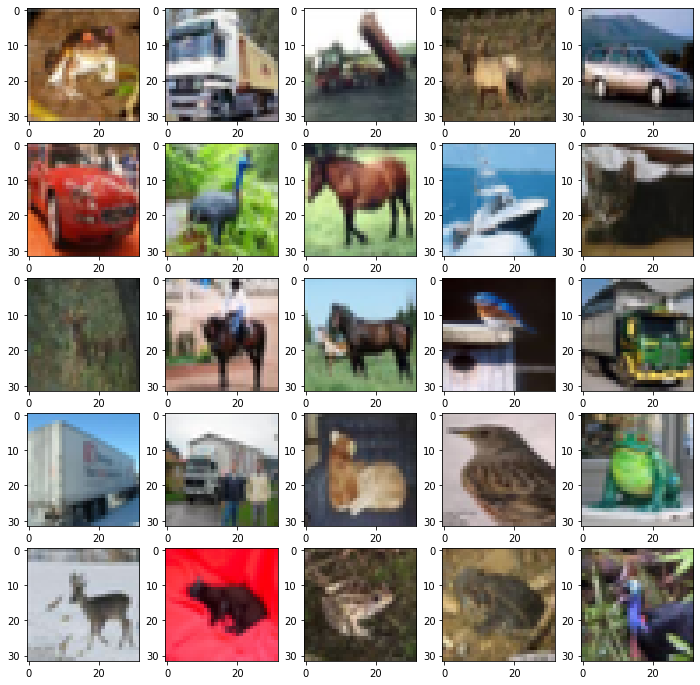

In [3]:
# データをプロット
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])

In [0]:
# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [0]:
from tensorflow.keras import models, layers

In [8]:
# シードの固定
reset_seed(0)

# モデル構築
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 
  
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [9]:
# 学習の詳細設定
batch_size = 1024
epochs = 100

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/100
49/49 [==============================] - 4s 91ms/step - loss: 1.9388 - accuracy: 0.2983 - val_loss: 1.6644 - val_accuracy: 0.4077
Epoch 2/100
49/49 [==============================] - 4s 74ms/step - loss: 1.5489 - accuracy: 0.4469 - val_loss: 1.4236 - val_accuracy: 0.4926
Epoch 3/100
49/49 [==============================] - 4s 75ms/step - loss: 1.3898 - accuracy: 0.5062 - val_loss: 1.3191 - val_accuracy: 0.5354
Epoch 4/100
49/49 [==============================] - 4s 75ms/step - loss: 1.3017 - accuracy: 0.5417 - val_loss: 1.2543 - val_accuracy: 0.5525
Epoch 5/100
49/49 [==============================] - 4s 75ms/step - loss: 1.2157 - accuracy: 0.5745 - val_loss: 1.1717 - val_accuracy: 0.5883
Epoch 6/100
49/49 [==============================] - 4s 74ms/step - loss: 1.1371 - accuracy: 0.6041 - val_loss: 1.1765 - val_accuracy: 0.5861
Epoch 7/100
49/49 [==============================] - 4s 75ms/step - loss: 1.0751 - accuracy: 0.6264 - val_loss: 1.1034 - val_accuracy: 0.6115
Epoch 

In [10]:
results = pd.DataFrame(history.history)
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
99,0.009027,0.9999,1.990834,0.7271


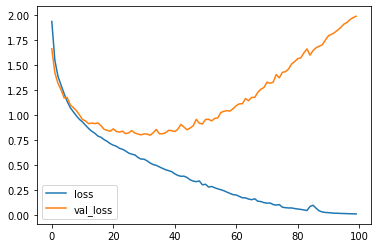

In [11]:
results[['loss', 'val_loss']].plot()

In [0]:
# サンプルイメージ
img = x_train[4]

In [0]:
# データ拡張のためのモジュール
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# 処理後を可視化する関数
def show(img, datagen):
    # (batch_size, height, width, channel) に reshape する
    img_batch = img.reshape(1, 32, 32, 3)

    # datagen.flow() でデータセットから Augmentation 処理をかけながらミニバッチを読み込む
    # 今回は、1 サンプルのデータセットを batch_size=1 で読み込む。
    for img_augmented in datagen.flow(img_batch, batch_size=1):
        # batch_size の次元を削除
        out = img_augmented.reshape(32, 32, 3)
        break

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('before')
    plt.imshow(img)
  
    plt.subplot(1, 2, 2)
    plt.title('after')
    plt.imshow(out)

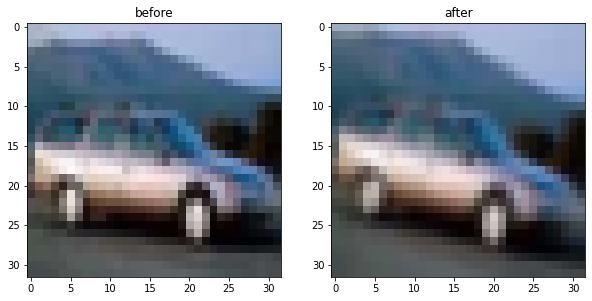

In [15]:
datagen = ImageDataGenerator(rotation_range=60)

show(img, datagen)

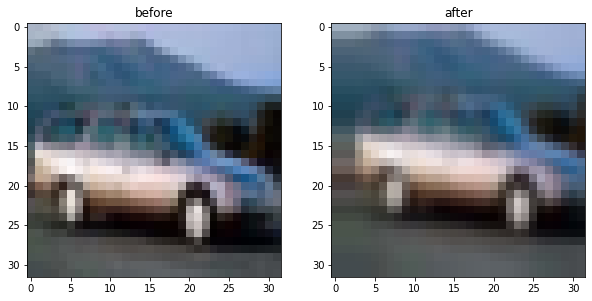

In [16]:
datagen = ImageDataGenerator(width_shift_range=0.5,
                             height_shift_range=0.5)

show(img, datagen)

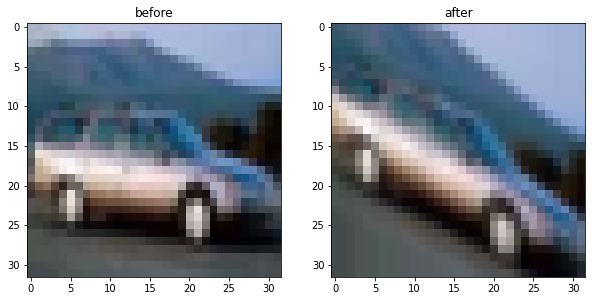

In [17]:
datagen = ImageDataGenerator(shear_range=30)

show(img, datagen)

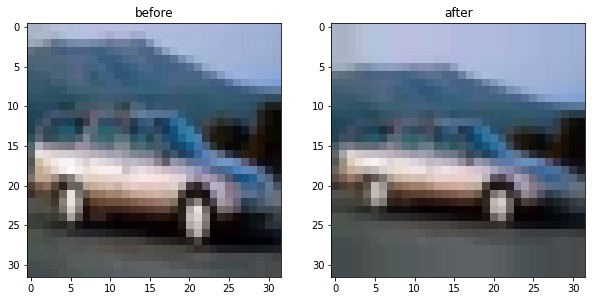

In [18]:
datagen = ImageDataGenerator(zoom_range=0.5)

show(img, datagen)

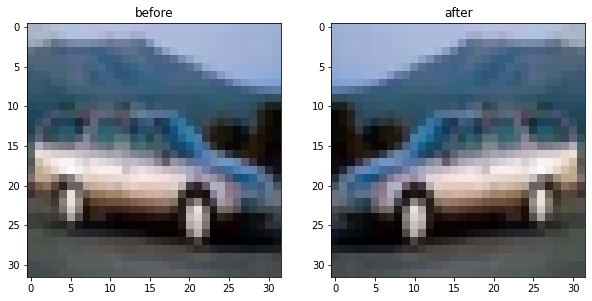

In [19]:
datagen = ImageDataGenerator(horizontal_flip=True)

show(img, datagen)

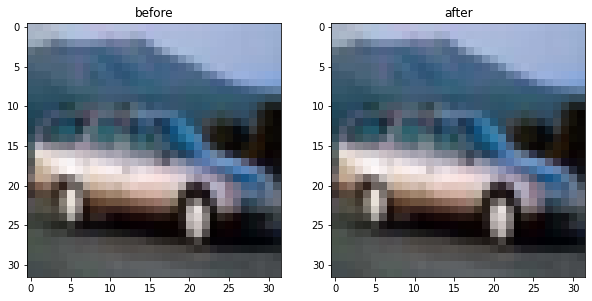

In [20]:
datagen = ImageDataGenerator(vertical_flip=True)

show(img, datagen)

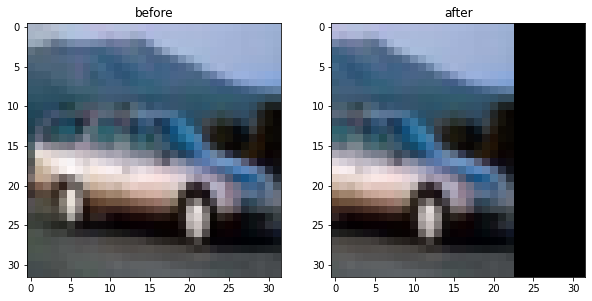

In [21]:
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='constant')
show(img, datagen)

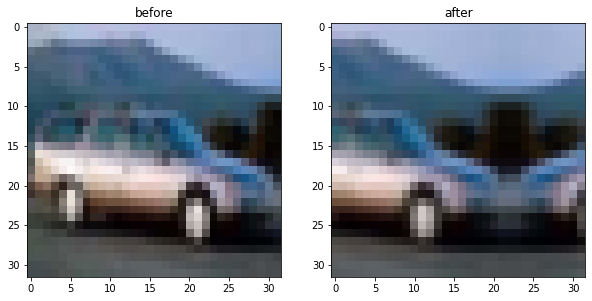

In [22]:
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='reflect')
show(img, datagen)

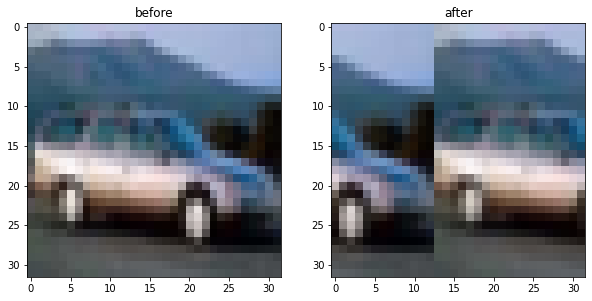

In [23]:
datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='wrap')
show(img, datagen)

In [0]:
# 画像保存する関数
from tensorflow.keras.preprocessing import image

In [25]:
# サンプル画像の用意
img = x_train[4]

# 水増し処理を定義
datagen = ImageDataGenerator(vertical_flip=True)

# (batch_size, height, width, channel) に reshape する
img_batch = img.reshape(1, 32, 32, 3)

# 今回は 1 枚だけ保存します
max_img_num = 1
counts = 1
for img_augmented in datagen.flow(img_batch, batch_size=1):
    # batch_size の次元を削除
    img_augmented = img_augmented.reshape(32, 32, 3)
    # 画像を保存
    image.save_img('augmented_output.png', img_augmented)
    # max_img_num の枚数を保存したら終了
    if (counts % max_img_num) == 0:
        print('Finish!!')
        break
    counts += 1

Finish!!


In [0]:
# 適用したいデータ拡張の種類を定義
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True)

In [27]:
# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 
  
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
 
# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [28]:
batch_size = 1024
epochs = 100

history = model.fit_generator(datagen.flow(x_train, t_train, batch_size=batch_size),
                    steps_per_epoch = len(x_train) / batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, t_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
49/48 [==============================] - 5s 95ms/step - loss: 2.0119 - accuracy: 0.1351 - val_loss: 1.7811 - val_accuracy: 0.0383
Epoch 2/100
49/48 [==============================] - 4s 90ms/step - loss: 1.6833 - accuracy: 0.0958 - val_loss: 1.6471 - val_accuracy: 0.1343
Epoch 3/100
49/48 [==============================] - 4s 90ms/step - loss: 1.5665 - accuracy: 0.0969 - val_loss: 1.5291 - val_accuracy: 0.0759
Epoch 4/100
49/48 [==============================] - 4s 90ms/step - loss: 1.4842 - accuracy: 0.0942 - val_loss: 1.4891 - val_accuracy: 0.0701
Epoch 5/100
49/48 [==============================] - 4s 89ms/step - loss: 1.4318 - accuracy: 0.0946 - val_loss: 1.4008 - val_accuracy: 0.0899
Epoch 6/100
49/48 [==============================] - 4s 90ms/step - loss: 1.3701 - accuracy: 0.0964 - val_loss: 1.3547 - val_accuracy: 0.0735
Epoch 7/100
49/48 [==============================] - 4s 90ms/step - loss

In [29]:
results = pd.DataFrame(history.history)
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
99,0.48302,0.0999,0.79164,0.097


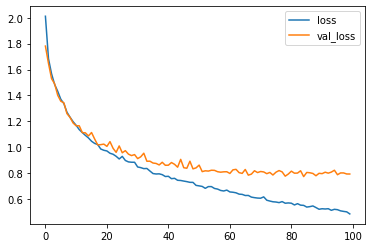

In [30]:
results[['loss', 'val_loss']].plot()